Question 1

Supervised learning: Has labels, target, a clear goal in mind with your dataset. What you want to classify or not.

Unsupervised learning: When you don't have a clear goal for your dataset. No target variable to work with.

Question 2

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We assign the points with their proximety to the centriod. So Centriod 1 (C) would have points A and B, while Centroid 2 (D) would have points E and F

Question 3

Silhouette Coefficient of Point c:

In [42]:
#Here is our points
a = (1.5, 2)
b = (1, 1)
c = (2, 1)
d = (3, 2)
e = (3.5, 1)
f = (3.5, 2.5)

In [43]:
import math

#Calculating c's distance to A and B
distance_to_a = math.sqrt((c[0] - a[0])**2 + (c[1] - a[1])**2)
distance_to_b = math.sqrt((c[0] - b[0])**2 + (c[1] - b[1])**2)

#Calculating average
average_distance_same_cluster = (distance_to_a + distance_to_b) / 2

print("Cluster 1 Average:", average_distance_same_cluster)


Cluster 1 Average: 1.0590169943749475


In [44]:
#Calculating c's distance to the other cluster
distance_to_d = math.sqrt((c[0] - d[0])**2 + (c[1] - d[1])**2)
distance_to_e = math.sqrt((c[0] - e[0])**2 + (c[1] - e[1])**2)
distance_to_f = math.sqrt((c[0] - f[0])**2 + (c[1] - f[1])**2)

#Calculating average
average_distance_different_cluster = (distance_to_d + distance_to_e + distance_to_f) / 3

print("Cluster 2 Average:", average_distance_different_cluster)


Cluster 2 Average: 1.6785113019775793


In [45]:
SC = 1 - average_distance_same_cluster/average_distance_different_cluster
print("Silouette Coefficent: ", SC)

Silouette Coefficent:  0.36907365882658005


Question 4

In [46]:
import numpy as np

#Create the clusters, set 1 has 2 clusters, while set 2 has 3.
set1 = [np.array([-5, -4, -2, -1]), np.array([2, 3, 4])]
set2 = [np.array([-5, -4]), np.array([-2, -1]), np.array([2, 3, 4])]

#Getting the SSE from the randomly selected centroids
centroids_set1 = [cluster.mean(axis=0) for cluster in set1]
sse_set1 = sum(((cluster - centroid) ** 2).sum() for cluster, centroid in zip(set1, centroids_set1))

#Repeat for set 2
centroids_set2 = [cluster.mean(axis=0) for cluster in set2]
sse_set2 = sum(((cluster - centroid) ** 2).sum() for cluster, centroid in zip(set2, centroids_set2))

print("SSE Set 1:", sse_set1)
print("SSE Set 2:", sse_set2)

SSE Set 1: 12.0
SSE Set 2: 3.0


I beleieve the first method calculated the distance, while the second just used the values within the cluster set. The second method is more preferable. 

Question 5

How does feature reduction work differently for a supervised-learning problem and an unsupervised-learning problem?

Supervised learning seems to focus more on what's around it to predict a data outcome, while unsupervised utalizes reducing dimensionality to find hidden patterns in the data.

Question 6

In [47]:
df = pd.read_csv("wine-clustering.csv")

In [48]:
df.head

<bound method NDFrame.head of      Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \


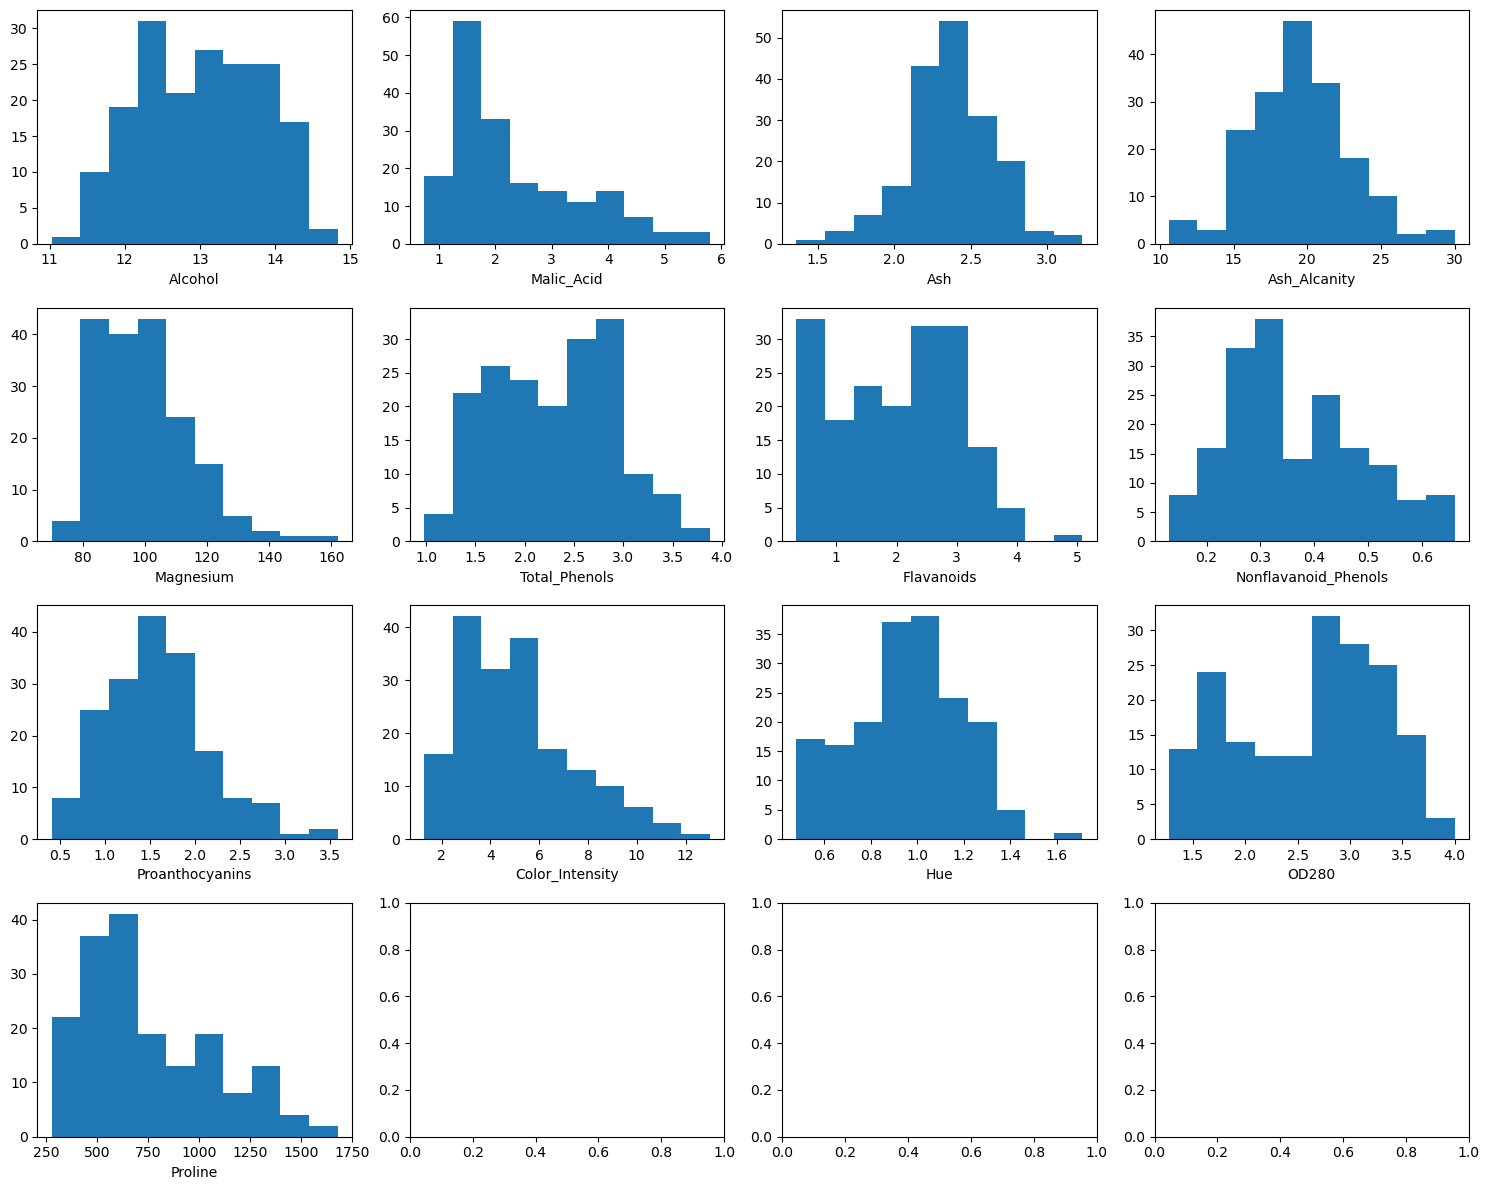

In [49]:
#Checking for Uniform Values with histogram
column_names = df.columns
num_rows = 4  
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

axes = axes.ravel()

for i, column_name in enumerate(column_names):

    data_column = df[column_name]
    axes[i].hist(data_column)
    axes[i].set_xlabel(column_name)

plt.tight_layout()
plt.show()


In [50]:
#The only graph that looks somewhat uniform is "Flavnoids", so we'll drop that dataset.

df.drop(columns=['Flavanoids'], inplace=True)

Question 7

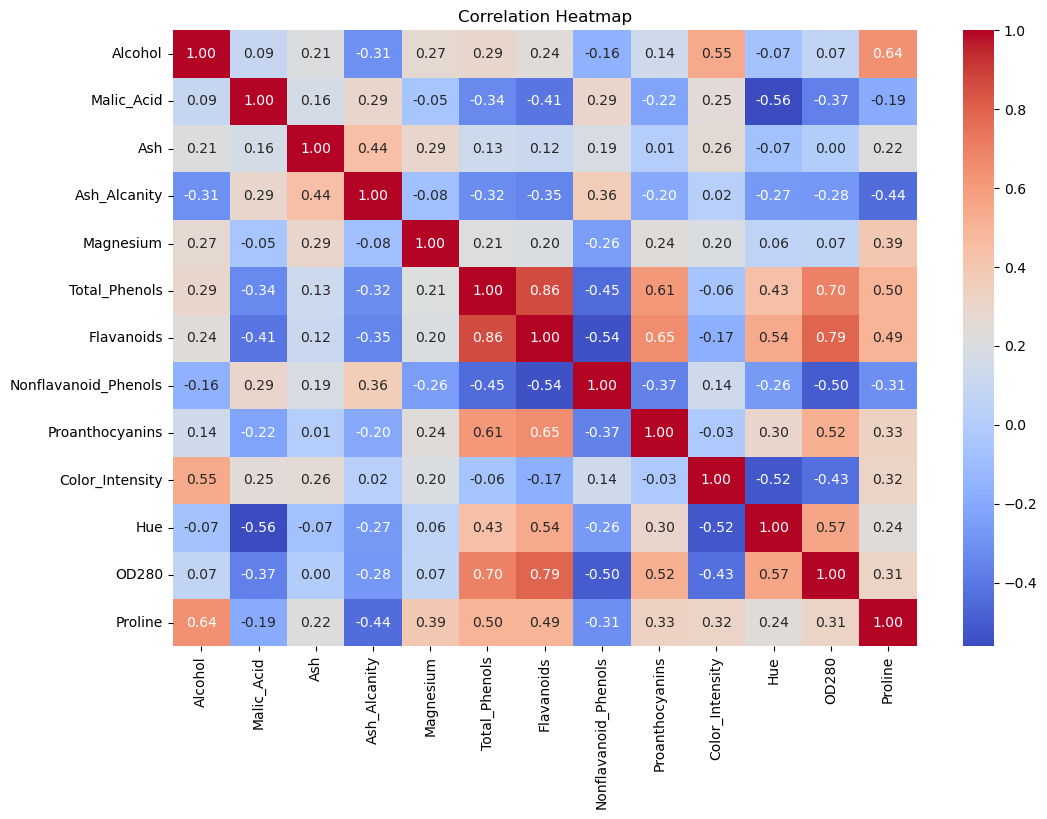

In [51]:
#To back up what we've found, we need to check for features with uniform values by putting our columns into a heatmap.
data = pd.read_csv('wine-clustering.csv')

correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Question 8

In [52]:
#Using MinMaxScaler, we can normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)


print(normalized_df.head())


    Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  0.842105    0.191700  0.572193      0.257732   0.619565       0.627586   
1  0.571053    0.205534  0.417112      0.030928   0.326087       0.575862   
2  0.560526    0.320158  0.700535      0.412371   0.336957       0.627586   
3  0.878947    0.239130  0.609626      0.319588   0.467391       0.989655   
4  0.581579    0.365613  0.807487      0.536082   0.521739       0.627586   

   Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity       Hue     OD280  \
0              0.283019         0.593060         0.372014  0.455285  0.970696   
1              0.245283         0.274448         0.264505  0.463415  0.780220   
2              0.320755         0.757098         0.375427  0.447154  0.695971   
3              0.207547         0.558360         0.556314  0.308943  0.798535   
4              0.490566         0.444795         0.259386  0.455285  0.608059   

    Proline  
0  0.561341  
1  0.550642  
2  0.646

Question 9

C:\Users\kadel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kadel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kadel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kadel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

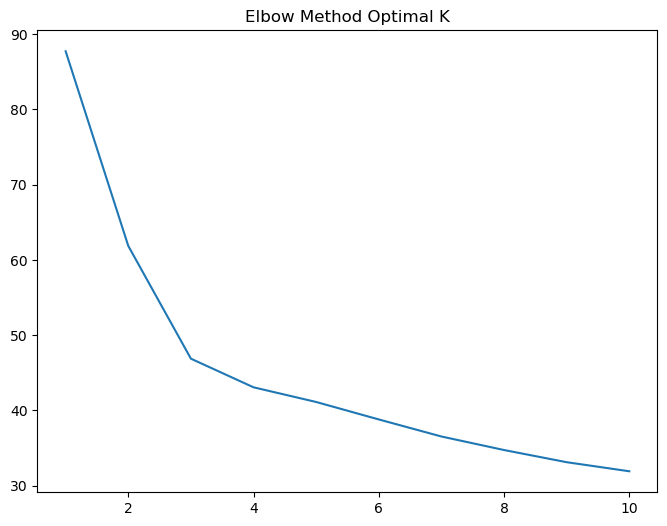

In [53]:
from sklearn.cluster import KMeans

#We're going to set up k-values for the elbow method. We should get a graph with a line, where the 'elbow' is the value
k_values = range(1, 11)
inertia_values = []


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_df)
    inertia_values.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values)
plt.title('Elbow Method Optimal K')
plt.show()

In [54]:
#The optimal K, at the elbow point, is '3'.

Question 10

In [55]:
#Lastly, we're going to use the Silhouette Coefficient method, and see if we can find the same optimal K value

In [60]:
from sklearn import metrics
sil = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score = metrics.silhouette_score(X, kmeans.labels_)
    sil.append(score)
    print(k, " ", score )

C:\Users\kadel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kadel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kadel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kadel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

2   0.6568629369461448
3   0.5711661463843272


C:\Users\kadel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kadel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kadel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kadel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

4   0.5620673434464818
5   0.5490475604888427


C:\Users\kadel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kadel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


6   0.5656920873146795
7   0.5622473971723317


C:\Users\kadel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kadel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kadel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kadel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

8   0.5536654108523217
9   0.5261440472118


C:\Users\kadel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kadel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kadel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


10   0.5204876747925146


C:\Users\kadel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


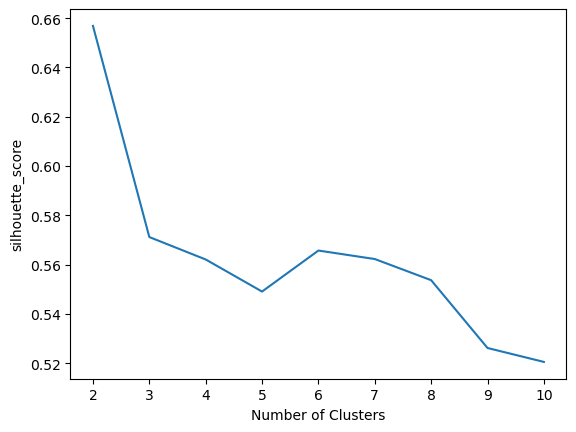

In [61]:
plt.plot(range(2, 11), sil)
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette_score")
plt.show()

3 is still the first 'bend' in our graph. There are others now however, and the graph takes a much more shifty nature. I beleieve this means that technically, 3 is still our optimal K.

THIS IS AN INDIVIDUAL ASSIGNMENT. YOU MAY NOT DISCUSS THIS ASSIGNMENT WITH ANYONE WITHIN OR OUTSIDE THE CLASS (except the instructor) DO not discuss your approaches or your code with colleagues. There are many ways to implement this assignment, and it is extremely easy to spot code that has been inspired by someone else’s code and to identify unauthorized collaborations.If you choose to utilize something you find online, cite that resource, but DO NOT share that resource with anyone else.By submitting this assignment, you certify that no unauthorized assistance has been received or given in the completion of this work. Kade Levy